In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from pywaffle import Waffle

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.drop('RowNumber', axis=1, inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


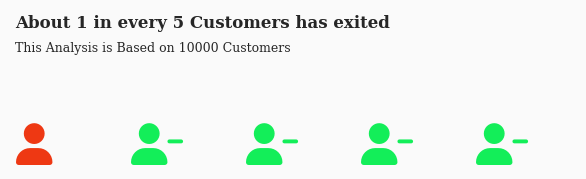

In [16]:
# Check the distribution of the data
background_color = '#fafafa'
# pywaffle library
data = {'left': 1, 'Stayed': 4}
fig = plt.figure(
    figsize=(4,2),
    dpi=150,
    facecolor=  background_color,
    FigureClass = Waffle,
    rows = 1,
    values = data,
    colors = ['#EE3813', '#13EE59'],
    legend = {'loc': 2, 'bbox_to_anchor': (1,1)},
    icons =['user', 'user-minus'],
    font_size = 20,
    vertical = True

    )
fig.text(0.035, 0.78, 'About 1 in every 5 Customers has exited', fontfamily='serif',
 fontsize = 8, fontweight = 'bold')
fig.text(0.035, 0.70, 'This Analysis is Based on 10000 Customers', fontfamily='serif',
fontsize = 6)
fig.gca().get_legend().remove()
fig.tight_layout()
plt.savefig('img/distribution.png')
plt.show()

The y variable is highly imbalanced. The number of customers that did not exit are ~80% while the ones that did are about 20%. This was expected given that it would be highly unlikely for a company to lose the same number of customers as it was keeping. <br>
The goal of this project is to create a machine learning model that predicts the customers that are likely to churn and therefore deal with their respective issues before they do so. <br>
The data being highly imbalanced will cause us problems in terms of recall and precision metrics. Therefore we will apply balancing techniques to the data before any machine learning model is fitted. However, we will start by exploring and cleaning our data.

# Exploratory Data Analysis and Visualization

In [5]:
print(f"shape of the data {df.shape}")
print('***' * 10)
print(df.info())

shape of the data (10000, 13)
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


We will drop additional columns 'customerId' and 'Surname' as I do not think they will be significant to our model

In [6]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)